# Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [32]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import warnings

warnings.filterwarnings('ignore')

# Set default parameters for LaTex and font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

In [5]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [44]:
query = """
SELECT
  EXTRACT(
    YEAR
    FROM hire_date
  ) AS hire_year
  ,COUNT(*) AS emp_num
FROM employees
GROUP BY hire_year
ORDER BY hire_year ASC
;
"""
df = pd.read_sql(query, con)
df

,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

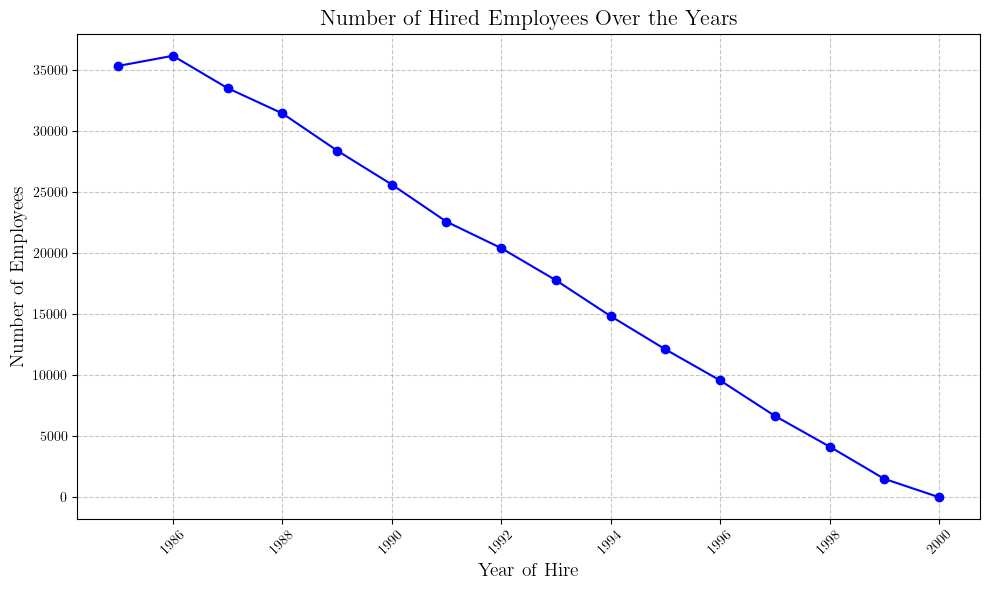

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(df['hire_year'], 
         df['emp_num'], 
         marker='o', 
         linestyle='-', 
         color='b')

plt.title('Number of Hired Employees Over the Years', fontsize=16)
plt.xlabel('Year of Hire', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.grid(True, 
         linestyle='--', 
         alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [43]:
query_position = """
SELECT
  TIMESTAMPDIFF(YEAR, from_date, to_date) as duration
  ,from_date
  ,to_date
FROM titles
WHERE
  title = 'Engineer'
  AND to_date != '9999-01-01'
;
"""

df_years = pd.read_sql(query_position, con)
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

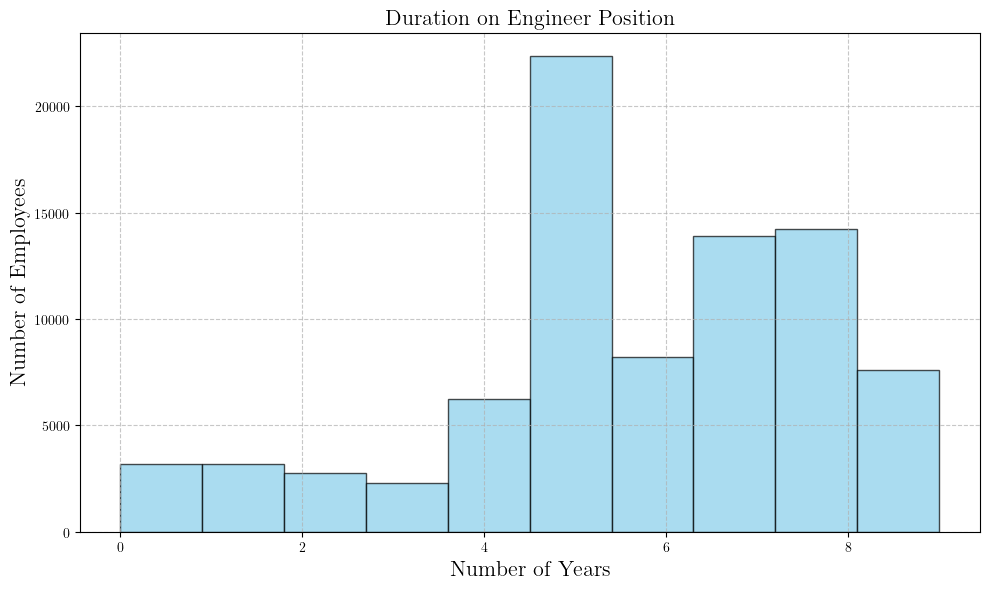

In [48]:
plt.figure(figsize=(10, 6))

plt.hist(df_years['duration'], 
        bins=10,
        color='skyblue', 
        edgecolor='black', 
        alpha=0.7)

plt.title('Duration on Engineer Position', fontsize=16)
plt.xlabel('Number of Years', fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)

plt.grid(True, 
         linestyle='--', 
         alpha=0.7)

plt.tight_layout()
plt.show();

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [46]:
con.close()